In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_log(logfile, save=None):
    epoch_regex = re.compile("Epoch: \[.*/200\].*Time.*")
    best_dice_regex = re.compile("best mean dice:.*")
    runtime_regex = re.compile("Time elapsed.*")
    epochs = []
    epoch_times = []
    whole_epoch_times = []
    best_mean_dices = []
    with open(logfile, 'r') as f:
        for l in f.read().splitlines():
            if re.match(epoch_regex, l):
                m = re.search(r"Epoch: \[(.*?)/200\]", l)
                epoch = int(m.group(1))
                m = re.search(r".*Time(.*?)\(", l)
                epoch_time = float(m.group(1))
                epochs.append(epoch)
                epoch_times.append(epoch_time)
            if re.match(best_dice_regex, l):
                m = re.search(r"best mean dice: (.*?) at.*", l)
                best_mean_dice = float(m.group(1))
                best_mean_dices.append(best_mean_dice)
            if re.match(runtime_regex, l):
                m = re.findall(r"(?<![a-zA-Z:])[-+]?\d*\.?\d+", l)
                if m:
                    if 'before training' in l:
                        whole_epoch_times.append(float(m[0]))
                    else:
                        whole_epoch_times.append(float(m[1]))
    return epochs, epoch_times, best_mean_dices, whole_epoch_times

In [2]:
result_home = '/home/yuantingh/monai_result/'
x1, y1, z1, total_time_1 = parse_log(result_home + '1419246/joblog.log')
x2, y2, z2, total_time_2 = parse_log(result_home + '1419250/joblog.log')
x3, y3, z3, total_time_3 = parse_log(result_home + '1419251/joblog.log')
x4, y4, z4, total_time_4 = parse_log(result_home + '1419287/joblog.log')
y4 = (np.array(y4[::2]) + np.array(y4[1::2])) / 2
total_time_4 = (np.array(total_time_4[::2]) + np.array(total_time_4[1::2])) / 2

In [3]:
# pre training dice is 0
z1 = [0] + z1
z2 = [0] + z2
z3 = [0] + z3
z4 = [0] + z4

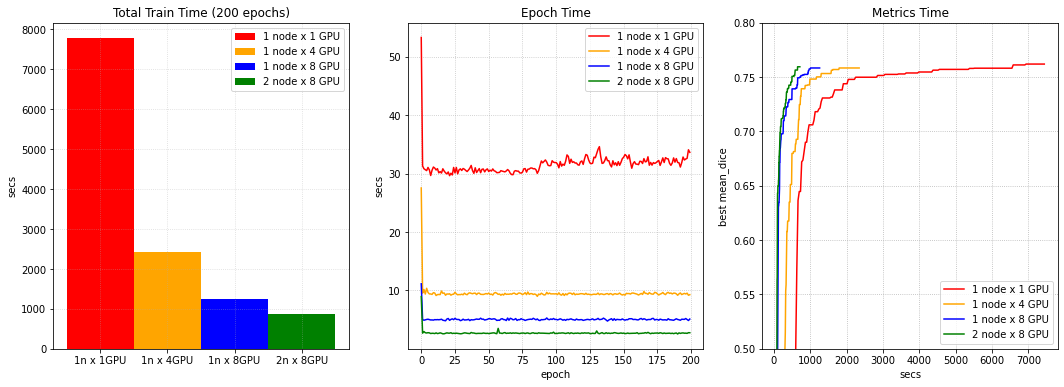

In [4]:
plt.figure('train', (18, 6))
plt.subplot(1, 3, 1)
plt.title('Total Train Time (200 epochs)')
plt.bar('1n x 1GPU', 7781, 1, label='1 node x 1 GPU', color='red')
plt.bar('1n x 4GPU', 2414, 1, label='1 node x 4 GPU', color='orange')
plt.bar('1n x 8GPU', 1255, 1, label='1 node x 8 GPU', color='blue')
plt.bar('2n x 8GPU', 877, 1, label='2 node x 8 GPU', color='green')
plt.ylabel('secs')
plt.grid(alpha=0.5, linestyle=':')
plt.legend(loc='best')

plt.subplot(1, 3, 2)
plt.title('Epoch Time')
plt.xlabel('epoch')
plt.ylabel('secs')
plt.plot(x1, y1, label='1 node x 1 GPU', color='red')
plt.plot(x1, y2, label='1 node x 4 GPU', color='orange')
plt.plot(x1, y3, label='1 node x 8 GPU', color='blue')
plt.plot(x1, y4, label='2 node x 8 GPU', color='green')
plt.grid(alpha=0.8, linestyle=':')
plt.legend(loc='best')

plt.subplot(1, 3, 3)
plt.title('Metrics Time')
plt.xlabel('secs')
plt.ylabel('best mean_dice')
plt.plot(total_time_1,z1, label='1 node x 1 GPU', color='red')
plt.plot(total_time_2,z2, label='1 node x 4 GPU', color='orange')
plt.plot(total_time_3,z3, label='1 node x 8 GPU', color='blue')
plt.plot(total_time_4,z4, label='2 node x 8 GPU', color='green')
axes = plt.gca()
axes.set_ylim([0.5, 0.8])
plt.grid(alpha=1.0, linestyle=':')
plt.legend(loc='best')
plt.show()